# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#get weather data 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperal"
weather_api_key = "8ee320d00a76af787d879f8bc76620aa"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
WData = requests.get(query_url+"chicago").json()
display(WData)


{'coord': {'lon': -87.65, 'lat': 41.85},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 272.26,
  'feels_like': 267.22,
  'temp_min': 271.48,
  'temp_max': 273.15,
  'pressure': 1017,
  'humidity': 97},
 'visibility': 10000,
 'wind': {'speed': 4.1, 'deg': 240},
 'clouds': {'all': 90},
 'dt': 1609722816,
 'sys': {'type': 1,
  'id': 4861,
  'country': 'US',
  'sunrise': 1609679895,
  'sunset': 1609713114},
 'timezone': -21600,
 'id': 4887398,
 'name': 'Chicago',
 'cod': 200}

In [ ]:
# Empty lists of data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# Loop through cities
for city in cities:
    WData = requests.get(query_url+city).json()
    try: 
        clouds_list.append(WData["clouds"]["all"])
        country_list.append(WData["sys"]["country"])
        lat_list.append(WData["coord"]["lat"])
        lng_list.append(WData["coord"]["lon"])
        temp_list.append(WData["main"]["temp_max"])
        humidity_list.append(WData["main"]["humidity"])
        wind_speed_list.append(WData["wind"]["speed"])
        city_name_list.append(city)
        print(f"near by city {city}")
    except: 
        print("city not found")

city_name_list    

near by city puri
near by city rikitea
city not found
near by city labuhan
near by city port keats
near by city busselton
near by city maceio
city not found
near by city provideniya
near by city ushuaia
near by city hualmay
near by city hermanus
near by city butaritari
near by city norman wells
near by city saint george
near by city robertsport
near by city puerto ayora
near by city severo-kurilsk
near by city soanierana ivongo
near by city moundsville
city not found
near by city thompson
near by city mount gambier
near by city punta arenas
near by city ancud
near by city ribeira grande
near by city baykit
near by city longyearbyen
near by city barkhan
near by city castro
near by city saint-philippe
near by city rebrikha
near by city edendale
near by city atuona
near by city victoria
near by city airai
city not found
near by city chirongui
near by city mataura
near by city bluff
near by city varzea alegre
near by city dongsheng
near by city erenhot
near by city hobart
near by city opuw

near by city sinnamary
near by city narsaq
city not found
near by city cururupu
near by city yorkton
near by city ulaanbaatar
near by city nanyang
near by city taoudenni
near by city makakilo city
near by city amapa
near by city cap malheureux
near by city sao filipe
near by city khipro
near by city neiafu
near by city westport
near by city vila velha
near by city zeya
near by city zhigansk
near by city caravelas
near by city horadiz
near by city wolfville
near by city shitanjing
near by city severo-yeniseyskiy
city not found
near by city margate
near by city parabel
near by city san cristobal
near by city muros
near by city kolondieba
city not found
near by city alto araguaia
near by city minggang
near by city besikduzu
near by city tigil
near by city quatre cocos
near by city lalmohan
near by city puli
near by city san andres
near by city cacahuatepec
near by city port hardy
near by city vestmannaeyjar
near by city batagay-alyta


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Data into a dataframe
cities_df = pd.DataFrame({"City": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})
cities_df.head()

,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,puri,IN,19.80,85.85,287.15,93,0,3.41
1,rikitea,PF,-23.12,-134.97,298.80,80,0,8.48
2,labuhan,ID,-6.88,112.21,300.53,76,100,2.11
3,port keats,AU,-14.25,129.55,304.52,77,99,5.84
4,busselton,AU,-33.65,115.33,294.26,55,0,2.68


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
check_hum = cities_df.loc[(cities_df["Humidity"]>100)]
check_hum.head()                

,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed


In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

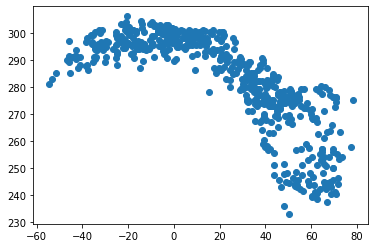

In [10]:
plt.scatter(cities_df["Lat"], cities_df["Temperature"])
plt.savefig("output_data/LatvsTemp.png")

## Latitude vs. Humidity Plot

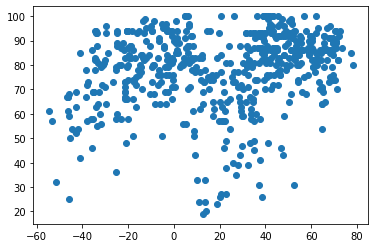

In [11]:
plt.scatter(cities_df["Lat"], cities_df["Humidity"])
plt.savefig("output_data/LatvsHumd.png")

## Latitude vs. Cloudiness Plot

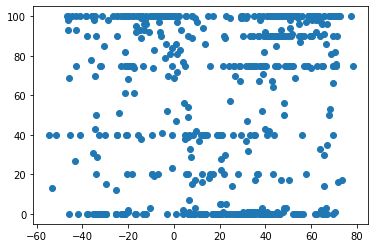

In [12]:
plt.scatter(cities_df["Lat"], cities_df["Clouds"])
plt.savefig("output_data/LatvsCloud.png")

## Latitude vs. Wind Speed Plot

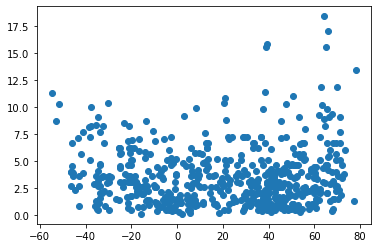

In [13]:
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"])
plt.savefig("output_data/LatvsWS.png")

## Linear Regression

In [14]:
#Using seaborn libary for linear regession function
import seaborn as sn
nh_df = cities_df.loc[cities_df["Lat"]>=0]
sh_df = cities_df.loc[cities_df["Lat"]<=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

C:\Users\18168\Anaconda3\envs\pythondata\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The regression displays a decrease with Lattitude.
As you move north from the equator the temperature decreases.


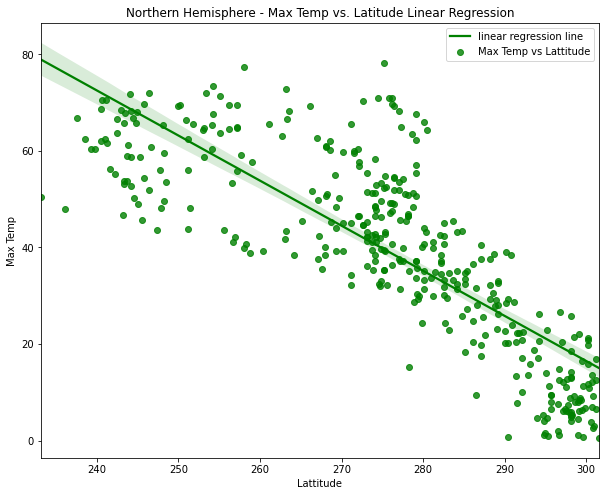

In [15]:
plt.figure(figsize=(10,8))
sn.regplot(nh_df["Temperature"], nh_df["Lat"], color="green")
plt.legend(labels=["linear regression line", "Max Temp vs Lattitude"])
plt.xlabel("Lattitude")
plt.ylabel("Max Temp")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print("The regression displays a decrease with Lattitude.")
print("As you move north from the equator the temperature decreases.")
plt.savefig("output_data/Regression_NtempvsLat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

C:\Users\18168\Anaconda3\envs\pythondata\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The regression displays a increase with Lattitude.
As you move south from the equator the temperature increases.


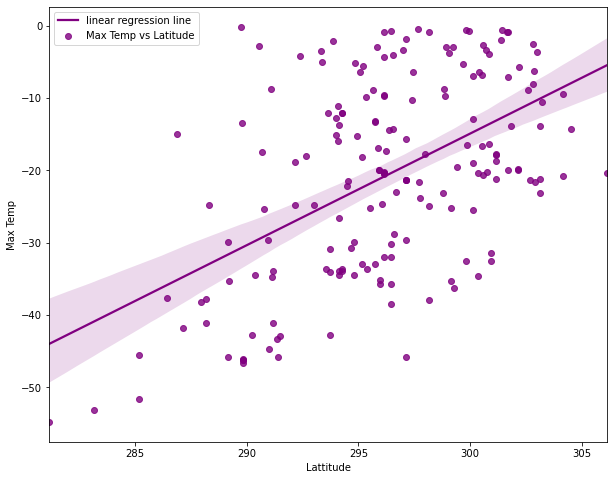

In [16]:
plt.figure(figsize=(10,8))
sn.regplot(sh_df["Temperature"], sh_df["Lat"], color="purple")
plt.legend(labels=["linear regression line", "Max Temp vs Latitude"])
plt.xlabel("Lattitude")
plt.ylabel("Max Temp")
print("The regression displays a increase with Lattitude.")
print("As you move south from the equator the temperature increases.")
plt.savefig("output_data/Regression_StempvsLat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

C:\Users\18168\Anaconda3\envs\pythondata\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The regression displays a increase with Lattitude.
As you move south from the equator the temperature increases.


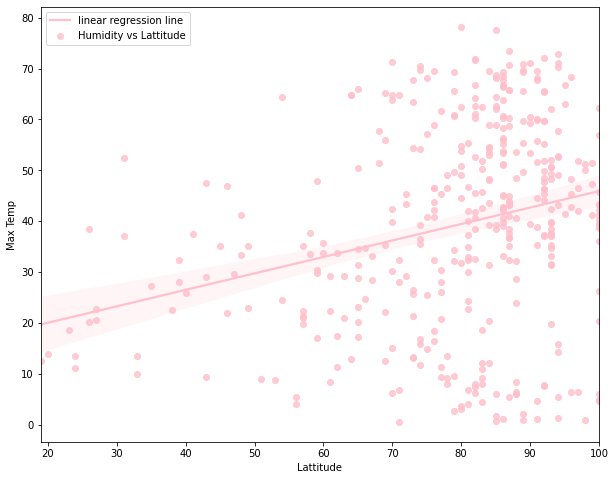

In [17]:
plt.figure(figsize=(10,8))
sn.regplot(nh_df["Humidity"], nh_df["Lat"], color="pink")
plt.legend(labels=["linear regression line", "Humidity vs Lattitude"])
plt.xlabel("Lattitude")
plt.ylabel("Max Temp")
print("The regression displays a increase with Lattitude.")
print("As you move south from the equator the temperature increases.")
plt.savefig("output_data/Regression_NHumvsLat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

C:\Users\18168\Anaconda3\envs\pythondata\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The regression displays a increase in humidity with Lattitude.
As you move south from the equator the humidity increases.


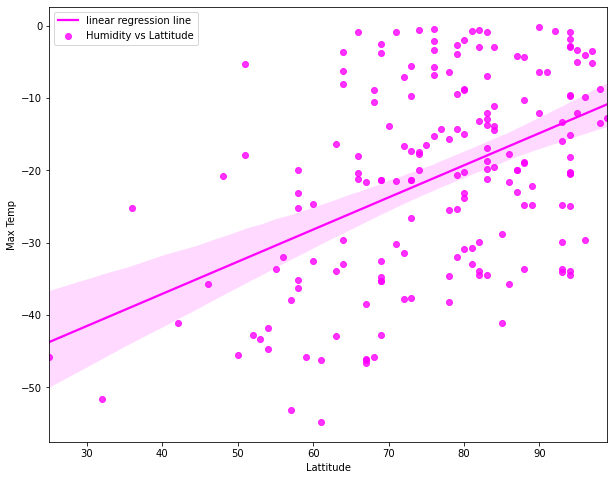

In [18]:
plt.figure(figsize=(10,8))
sn.regplot(sh_df["Humidity"], sh_df["Lat"], color="magenta")
plt.legend(labels=["linear regression line", "Humidity vs Lattitude"])
plt.xlabel("Lattitude")
plt.ylabel("Max Temp")
print("The regression displays a increase in humidity with Lattitude.")
print("As you move south from the equator the humidity increases.")
plt.savefig("output_data/Regression_NHumvsLat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

C:\Users\18168\Anaconda3\envs\pythondata\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The regression displays little increase in Cloudiness with Lattitude.
As you move north from the equator the Cloudiness slightly increases.


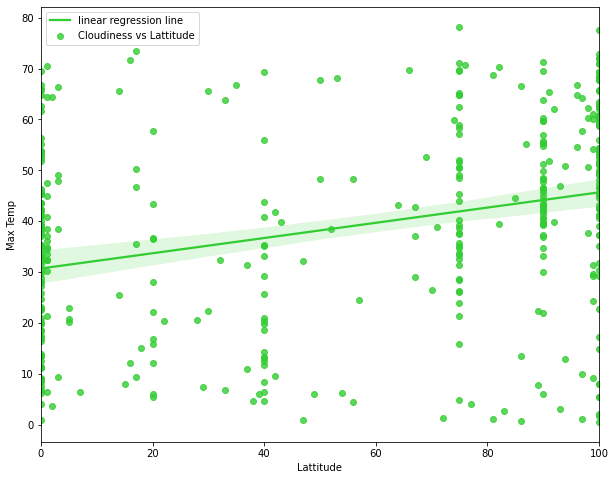

In [19]:
plt.figure(figsize=(10,8))
sn.regplot(nh_df["Clouds"], nh_df["Lat"], color="limegreen")
plt.legend(labels=["linear regression line", "Cloudiness vs Lattitude"])
plt.xlabel("Lattitude")
plt.ylabel("Max Temp")
print("The regression displays little increase in Cloudiness with Lattitude.")
print("As you move north from the equator the Cloudiness slightly increases.")
plt.savefig("output_data/Regression_NHumvsLat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

C:\Users\18168\Anaconda3\envs\pythondata\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The regression displays little increase in Cloudiness with lattitude.
As you move south from the equator the Cloudiness slightly increases.


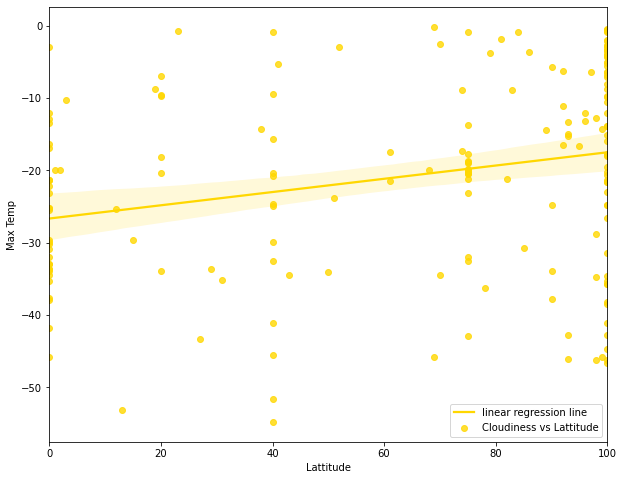

In [20]:
plt.figure(figsize=(10,8))
sn.regplot(sh_df["Clouds"], sh_df["Lat"], color="gold")
plt.legend(labels=["linear regression line", "Cloudiness vs Lattitude"])
plt.xlabel("Lattitude")
plt.ylabel("Max Temp")
print("The regression displays little increase in Cloudiness with lattitude.")
print("As you move south from the equator the Cloudiness slightly increases.")
plt.savefig("output_data/Regression_NHumvsLat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

C:\Users\18168\Anaconda3\envs\pythondata\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The regression displays a slight increase in Wind Speed.
As you move north from the equator the Wind Speed increases by 15%.


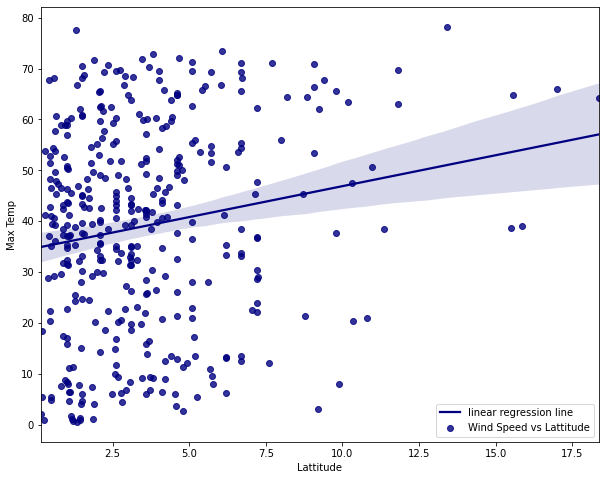

In [21]:
plt.figure(figsize=(10,8))
sn.regplot(nh_df["Wind Speed"], nh_df["Lat"], color="navy")
plt.legend(labels=["linear regression line", "Wind Speed vs Lattitude"])
plt.xlabel("Lattitude")
plt.ylabel("Max Temp")
print("The regression displays a slight increase in Wind Speed.")
print("As you move north from the equator the Wind Speed increases by 15%.")
plt.savefig("output_data/Regression_NHumvsLat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

C:\Users\18168\Anaconda3\envs\pythondata\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The regression displays an decrease in Wind Speed.
As you move north from the equator the Wind Speed decreases.


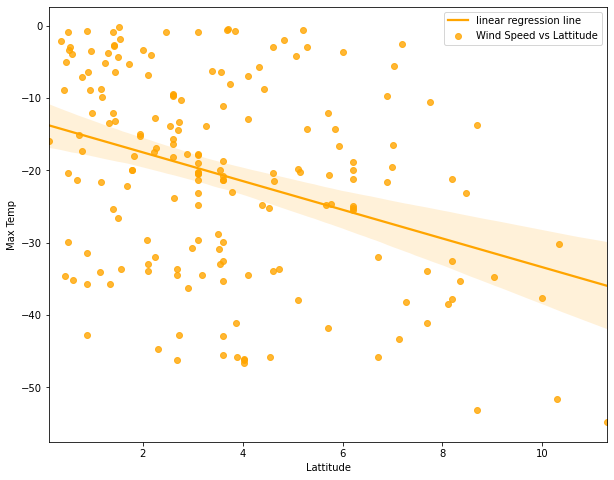

In [22]:
plt.figure(figsize=(10,8))
sn.regplot(sh_df["Wind Speed"], sh_df["Lat"], color="orange")
plt.legend(labels=["linear regression line", "Wind Speed vs Lattitude"])
plt.xlabel("Lattitude")
plt.ylabel("Max Temp")
print("The regression displays an decrease in Wind Speed.")
print("As you move north from the equator the Wind Speed decreases.")
plt.savefig("output_data/Regression_NHumvsLat.png")